In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: CNC
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 755 


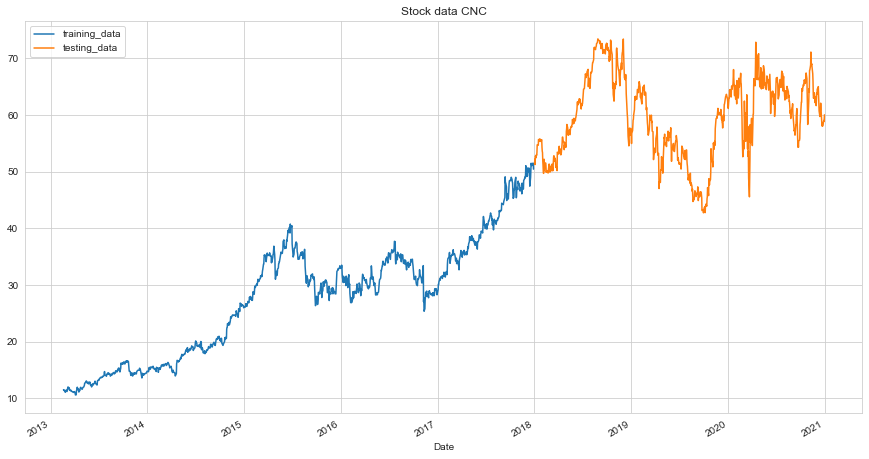

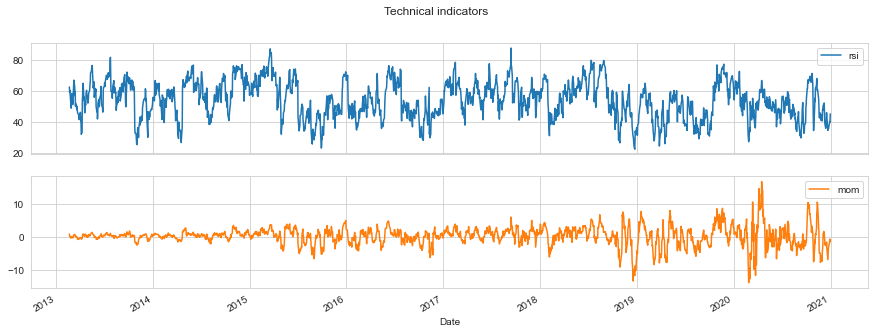

In [2]:
stock_name = 'cnc'.upper()
industry = 'Healthcare'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1752.48, duration: 0:00:00.249079
episode: 2/2000, episode end value: 1690.55, duration: 0:00:00.248039
episode: 3/2000, episode end value: 1736.38, duration: 0:00:00.249053
episode: 4/2000, episode end value: 1735.71, duration: 0:00:00.270058
episode: 5/2000, episode end value: 1785.14, duration: 0:00:00.265062
episode: 6/2000, episode end value: 1747.89, duration: 0:00:00.260056
episode: 7/2000, episode end value: 1799.30, duration: 0:00:00.264060
episode: 8/2000, episode end value: 1800.45, duration: 0:00:00.271054
episode: 9/2000, episode end value: 1790.51, duration: 0:00:00.297067
episode: 10/2000, episode end value: 1742.76, duration: 0:00:00.280061
episode: 11/2000, episode end value: 1735.41, duration: 0:00:00.272065
episode: 12/2000, episode end value: 1744.31, duration: 0:00:00.272062
episode: 13/2000, episode end value: 1735.11, duration: 0:00:00.294058
episode: 14/2000, episode end value: 1742.82, duration: 0:00:00.282067
episode: 15/200

episode: 117/2000, episode end value: 1749.47, duration: 0:00:00.247052
episode: 118/2000, episode end value: 1730.19, duration: 0:00:00.247058
episode: 119/2000, episode end value: 1775.14, duration: 0:00:00.241055
episode: 120/2000, episode end value: 1766.48, duration: 0:00:00.265070
episode: 121/2000, episode end value: 1721.52, duration: 0:00:00.250050
episode: 122/2000, episode end value: 1746.22, duration: 0:00:00.236051
episode: 123/2000, episode end value: 1727.68, duration: 0:00:00.250053
episode: 124/2000, episode end value: 1731.29, duration: 0:00:00.258058
episode: 125/2000, episode end value: 1742.42, duration: 0:00:00.243053
episode: 126/2000, episode end value: 1713.55, duration: 0:00:00.258060
episode: 127/2000, episode end value: 1741.10, duration: 0:00:00.263063
episode: 128/2000, episode end value: 1738.28, duration: 0:00:00.284060
episode: 129/2000, episode end value: 1721.36, duration: 0:00:00.256057
episode: 130/2000, episode end value: 1742.98, duration: 0:00:00

episode: 231/2000, episode end value: 1736.28, duration: 0:00:00.382085
episode: 232/2000, episode end value: 1720.19, duration: 0:00:00.420089
episode: 233/2000, episode end value: 1730.27, duration: 0:00:00.439761
episode: 234/2000, episode end value: 1709.66, duration: 0:00:00.389088
episode: 235/2000, episode end value: 1720.33, duration: 0:00:00.379088
episode: 236/2000, episode end value: 1733.06, duration: 0:00:00.356079
episode: 237/2000, episode end value: 1707.28, duration: 0:00:00.351078
episode: 238/2000, episode end value: 1698.91, duration: 0:00:00.403092
episode: 239/2000, episode end value: 1733.25, duration: 0:00:00.343074
episode: 240/2000, episode end value: 1719.63, duration: 0:00:00.322076
episode: 241/2000, episode end value: 1741.04, duration: 0:00:00.301065
episode: 242/2000, episode end value: 1716.45, duration: 0:00:00.303070
episode: 243/2000, episode end value: 1717.12, duration: 0:00:00.333053
episode: 244/2000, episode end value: 1702.81, duration: 0:00:00

episode: 345/2000, episode end value: 1719.93, duration: 0:00:00.440101
episode: 346/2000, episode end value: 1704.91, duration: 0:00:00.504661
episode: 347/2000, episode end value: 1728.14, duration: 0:00:00.433097
episode: 348/2000, episode end value: 1772.47, duration: 0:00:00.405093
episode: 349/2000, episode end value: 1743.84, duration: 0:00:00.453104
episode: 350/2000, episode end value: 1720.81, duration: 0:00:00.482745
episode: 351/2000, episode end value: 1731.57, duration: 0:00:00.448124
episode: 352/2000, episode end value: 1705.66, duration: 0:00:00.337075
episode: 353/2000, episode end value: 1726.38, duration: 0:00:00.339078
episode: 354/2000, episode end value: 1711.32, duration: 0:00:00.383086
episode: 355/2000, episode end value: 1730.02, duration: 0:00:00.407096
episode: 356/2000, episode end value: 1706.40, duration: 0:00:00.351087
episode: 357/2000, episode end value: 1713.81, duration: 0:00:00.372079
episode: 358/2000, episode end value: 1728.14, duration: 0:00:00

episode: 459/2000, episode end value: 1762.29, duration: 0:00:00.397367
episode: 460/2000, episode end value: 1728.77, duration: 0:00:00.431769
episode: 461/2000, episode end value: 1719.16, duration: 0:00:00.388093
episode: 462/2000, episode end value: 1710.65, duration: 0:00:00.392091
episode: 463/2000, episode end value: 1698.45, duration: 0:00:00.399092
episode: 464/2000, episode end value: 1720.47, duration: 0:00:00.433096
episode: 465/2000, episode end value: 1697.80, duration: 0:00:00.408096
episode: 466/2000, episode end value: 1711.35, duration: 0:00:00.456102
episode: 467/2000, episode end value: 1724.96, duration: 0:00:00.431098
episode: 468/2000, episode end value: 1696.62, duration: 0:00:00.329078
episode: 469/2000, episode end value: 1700.92, duration: 0:00:00.378089
episode: 470/2000, episode end value: 1760.27, duration: 0:00:00.338074
episode: 471/2000, episode end value: 1722.13, duration: 0:00:00.397082
episode: 472/2000, episode end value: 1717.92, duration: 0:00:00

episode: 573/2000, episode end value: 1711.89, duration: 0:00:00.459102
episode: 574/2000, episode end value: 1697.48, duration: 0:00:00.405097
episode: 575/2000, episode end value: 1772.96, duration: 0:00:00.398299
episode: 576/2000, episode end value: 1738.74, duration: 0:00:00.328678
episode: 577/2000, episode end value: 1713.01, duration: 0:00:00.367921
episode: 578/2000, episode end value: 1669.10, duration: 0:00:00.456178
episode: 579/2000, episode end value: 1706.84, duration: 0:00:00.418707
episode: 580/2000, episode end value: 1705.21, duration: 0:00:00.402095
episode: 581/2000, episode end value: 1710.86, duration: 0:00:00.375086
episode: 582/2000, episode end value: 1699.97, duration: 0:00:00.372085
episode: 583/2000, episode end value: 1709.63, duration: 0:00:00.415095
episode: 584/2000, episode end value: 1738.58, duration: 0:00:00.397089
episode: 585/2000, episode end value: 1727.11, duration: 0:00:00.420096
episode: 586/2000, episode end value: 1724.94, duration: 0:00:00

episode: 687/2000, episode end value: 1730.76, duration: 0:00:00.386081
episode: 688/2000, episode end value: 1723.95, duration: 0:00:00.346076
episode: 689/2000, episode end value: 1744.11, duration: 0:00:00.388090
episode: 690/2000, episode end value: 1720.39, duration: 0:00:00.459105
episode: 691/2000, episode end value: 1758.22, duration: 0:00:00.450103
episode: 692/2000, episode end value: 1704.14, duration: 0:00:00.413096
episode: 693/2000, episode end value: 1754.42, duration: 0:00:00.348075
episode: 694/2000, episode end value: 1724.44, duration: 0:00:00.432095
episode: 695/2000, episode end value: 1721.59, duration: 0:00:00.435099
episode: 696/2000, episode end value: 1720.31, duration: 0:00:00.414301
episode: 697/2000, episode end value: 1716.86, duration: 0:00:00.388858
episode: 698/2000, episode end value: 1734.18, duration: 0:00:00.380086
episode: 699/2000, episode end value: 1727.89, duration: 0:00:00.400091
episode: 700/2000, episode end value: 1761.76, duration: 0:00:00

episode: 801/2000, episode end value: 1722.04, duration: 0:00:00.347080
episode: 802/2000, episode end value: 1761.43, duration: 0:00:00.449102
episode: 803/2000, episode end value: 1748.58, duration: 0:00:00.381090
episode: 804/2000, episode end value: 1651.96, duration: 0:00:00.362081
episode: 805/2000, episode end value: 1709.54, duration: 0:00:00.337070
episode: 806/2000, episode end value: 1700.28, duration: 0:00:00.336078
episode: 807/2000, episode end value: 1710.17, duration: 0:00:00.413095
episode: 808/2000, episode end value: 1720.77, duration: 0:00:00.359080
episode: 809/2000, episode end value: 1711.16, duration: 0:00:00.424095
episode: 810/2000, episode end value: 1716.08, duration: 0:00:00.451340
episode: 811/2000, episode end value: 1715.12, duration: 0:00:00.433101
episode: 812/2000, episode end value: 1703.68, duration: 0:00:00.375085
episode: 813/2000, episode end value: 1697.05, duration: 0:00:00.431136
episode: 814/2000, episode end value: 1728.89, duration: 0:00:00

episode: 915/2000, episode end value: 1708.79, duration: 0:00:00.388088
episode: 916/2000, episode end value: 1717.73, duration: 0:00:00.372089
episode: 917/2000, episode end value: 1707.79, duration: 0:00:00.409092
episode: 918/2000, episode end value: 1648.00, duration: 0:00:00.336076
episode: 919/2000, episode end value: 1728.92, duration: 0:00:00.381085
episode: 920/2000, episode end value: 1712.90, duration: 0:00:00.429098
episode: 921/2000, episode end value: 1649.98, duration: 0:00:00.339077
episode: 922/2000, episode end value: 1789.84, duration: 0:00:00.375083
episode: 923/2000, episode end value: 1737.89, duration: 0:00:00.406091
episode: 924/2000, episode end value: 1745.75, duration: 0:00:00.396093
episode: 925/2000, episode end value: 1725.74, duration: 0:00:00.420075
episode: 926/2000, episode end value: 1738.46, duration: 0:00:00.373092
episode: 927/2000, episode end value: 1713.79, duration: 0:00:00.450101
episode: 928/2000, episode end value: 1745.85, duration: 0:00:00

episode: 1029/2000, episode end value: 1723.65, duration: 0:00:00.365082
episode: 1030/2000, episode end value: 1703.34, duration: 0:00:00.446100
episode: 1031/2000, episode end value: 1728.03, duration: 0:00:00.379086
episode: 1032/2000, episode end value: 1706.22, duration: 0:00:00.408093
episode: 1033/2000, episode end value: 1709.45, duration: 0:00:00.457101
episode: 1034/2000, episode end value: 1757.01, duration: 0:00:00.429096
episode: 1035/2000, episode end value: 1729.82, duration: 0:00:00.388087
episode: 1036/2000, episode end value: 1714.17, duration: 0:00:00.400090
episode: 1037/2000, episode end value: 1699.21, duration: 0:00:00.350080
episode: 1038/2000, episode end value: 1718.38, duration: 0:00:00.368084
episode: 1039/2000, episode end value: 1723.98, duration: 0:00:00.357079
episode: 1040/2000, episode end value: 1704.52, duration: 0:00:00.426102
episode: 1041/2000, episode end value: 1734.26, duration: 0:00:00.420094
episode: 1042/2000, episode end value: 1685.73, dur

episode: 1142/2000, episode end value: 1709.92, duration: 0:00:00.385087
episode: 1143/2000, episode end value: 1710.30, duration: 0:00:00.367085
episode: 1144/2000, episode end value: 1709.16, duration: 0:00:00.379084
episode: 1145/2000, episode end value: 1712.83, duration: 0:00:00.387092
episode: 1146/2000, episode end value: 1710.24, duration: 0:00:00.433101
episode: 1147/2000, episode end value: 1703.38, duration: 0:00:00.383086
episode: 1148/2000, episode end value: 1731.82, duration: 0:00:00.386087
episode: 1149/2000, episode end value: 1725.08, duration: 0:00:00.465104
episode: 1150/2000, episode end value: 1715.26, duration: 0:00:00.425101
episode: 1151/2000, episode end value: 1770.84, duration: 0:00:00.412088
episode: 1152/2000, episode end value: 1710.95, duration: 0:00:00.421096
episode: 1153/2000, episode end value: 1744.53, duration: 0:00:00.395089
episode: 1154/2000, episode end value: 1697.10, duration: 0:00:00.408091
episode: 1155/2000, episode end value: 1772.67, dur

episode: 1255/2000, episode end value: 1747.96, duration: 0:00:00.346081
episode: 1256/2000, episode end value: 1690.48, duration: 0:00:00.369082
episode: 1257/2000, episode end value: 1705.86, duration: 0:00:00.329073
episode: 1258/2000, episode end value: 1706.26, duration: 0:00:00.465106
episode: 1259/2000, episode end value: 1706.30, duration: 0:00:00.418093
episode: 1260/2000, episode end value: 1709.74, duration: 0:00:00.416095
episode: 1261/2000, episode end value: 1717.08, duration: 0:00:00.395089
episode: 1262/2000, episode end value: 1701.72, duration: 0:00:00.405095
episode: 1263/2000, episode end value: 1711.94, duration: 0:00:00.348079
episode: 1264/2000, episode end value: 1716.20, duration: 0:00:00.417099
episode: 1265/2000, episode end value: 1745.20, duration: 0:00:00.346079
episode: 1266/2000, episode end value: 1703.19, duration: 0:00:00.387087
episode: 1267/2000, episode end value: 1740.86, duration: 0:00:00.390088
episode: 1268/2000, episode end value: 1714.10, dur

episode: 1368/2000, episode end value: 1707.75, duration: 0:00:00.393089
episode: 1369/2000, episode end value: 1733.84, duration: 0:00:00.335080
episode: 1370/2000, episode end value: 1726.49, duration: 0:00:00.417096
episode: 1371/2000, episode end value: 1729.16, duration: 0:00:00.400083
episode: 1372/2000, episode end value: 1705.83, duration: 0:00:00.406093
episode: 1373/2000, episode end value: 1699.48, duration: 0:00:00.480109
episode: 1374/2000, episode end value: 1699.35, duration: 0:00:00.414094
episode: 1375/2000, episode end value: 1750.60, duration: 0:00:00.373082
episode: 1376/2000, episode end value: 1731.97, duration: 0:00:00.391086
episode: 1377/2000, episode end value: 1707.26, duration: 0:00:00.390087
episode: 1378/2000, episode end value: 1721.81, duration: 0:00:00.450099
episode: 1379/2000, episode end value: 1773.41, duration: 0:00:00.414091
episode: 1380/2000, episode end value: 1734.08, duration: 0:00:00.413096
episode: 1381/2000, episode end value: 1718.56, dur

episode: 1481/2000, episode end value: 1719.03, duration: 0:00:00.408093
episode: 1482/2000, episode end value: 1711.57, duration: 0:00:00.470109
episode: 1483/2000, episode end value: 1710.19, duration: 0:00:00.398090
episode: 1484/2000, episode end value: 1665.54, duration: 0:00:00.423096
episode: 1485/2000, episode end value: 1727.57, duration: 0:00:00.429093
episode: 1486/2000, episode end value: 1715.74, duration: 0:00:00.396092
episode: 1487/2000, episode end value: 1709.06, duration: 0:00:00.460103
episode: 1488/2000, episode end value: 1729.02, duration: 0:00:00.394092
episode: 1489/2000, episode end value: 1736.23, duration: 0:00:00.479109
episode: 1490/2000, episode end value: 1707.49, duration: 0:00:00.421095
episode: 1491/2000, episode end value: 1723.26, duration: 0:00:00.414097
episode: 1492/2000, episode end value: 1731.54, duration: 0:00:00.371082
episode: 1493/2000, episode end value: 1784.95, duration: 0:00:00.348082
episode: 1494/2000, episode end value: 1730.61, dur

episode: 1594/2000, episode end value: 1697.55, duration: 0:00:00.367088
episode: 1595/2000, episode end value: 1781.23, duration: 0:00:00.399090
episode: 1596/2000, episode end value: 1716.45, duration: 0:00:00.369080
episode: 1597/2000, episode end value: 1714.07, duration: 0:00:00.381086
episode: 1598/2000, episode end value: 1735.52, duration: 0:00:00.450104
episode: 1599/2000, episode end value: 1714.41, duration: 0:00:00.357080
episode: 1600/2000, episode end value: 1711.86, duration: 0:00:00.398089
episode: 1601/2000, episode end value: 1717.12, duration: 0:00:00.369081
episode: 1602/2000, episode end value: 1718.25, duration: 0:00:00.405096
episode: 1603/2000, episode end value: 1747.04, duration: 0:00:00.437100
episode: 1604/2000, episode end value: 1764.98, duration: 0:00:00.385089
episode: 1605/2000, episode end value: 1712.63, duration: 0:00:00.365084
episode: 1606/2000, episode end value: 1773.07, duration: 0:00:00.354081
episode: 1607/2000, episode end value: 1716.60, dur

episode: 1707/2000, episode end value: 1722.57, duration: 0:00:00.360084
episode: 1708/2000, episode end value: 1685.98, duration: 0:00:00.400089
episode: 1709/2000, episode end value: 1721.72, duration: 0:00:00.475106
episode: 1710/2000, episode end value: 1757.83, duration: 0:00:00.348078
episode: 1711/2000, episode end value: 1739.57, duration: 0:00:00.362086
episode: 1712/2000, episode end value: 1732.62, duration: 0:00:00.352077
episode: 1713/2000, episode end value: 1768.11, duration: 0:00:00.348078
episode: 1714/2000, episode end value: 1722.01, duration: 0:00:00.320077
episode: 1715/2000, episode end value: 1706.54, duration: 0:00:00.414098
episode: 1716/2000, episode end value: 1758.63, duration: 0:00:00.371083
episode: 1717/2000, episode end value: 1719.43, duration: 0:00:00.328079
episode: 1718/2000, episode end value: 1726.95, duration: 0:00:00.335068
episode: 1719/2000, episode end value: 1717.15, duration: 0:00:00.385090
episode: 1720/2000, episode end value: 1712.10, dur

episode: 1820/2000, episode end value: 1712.02, duration: 0:00:00.437097
episode: 1821/2000, episode end value: 1710.26, duration: 0:00:00.362749
episode: 1822/2000, episode end value: 1701.26, duration: 0:00:00.338161
episode: 1823/2000, episode end value: 1727.39, duration: 0:00:00.351707
episode: 1824/2000, episode end value: 1706.51, duration: 0:00:00.329075
episode: 1825/2000, episode end value: 1699.85, duration: 0:00:00.334077
episode: 1826/2000, episode end value: 1707.24, duration: 0:00:00.327072
episode: 1827/2000, episode end value: 1736.93, duration: 0:00:00.380085
episode: 1828/2000, episode end value: 1709.83, duration: 0:00:00.324071
episode: 1829/2000, episode end value: 1738.99, duration: 0:00:00.362588
episode: 1830/2000, episode end value: 1714.11, duration: 0:00:00.340488
episode: 1831/2000, episode end value: 1714.69, duration: 0:00:00.320836
episode: 1832/2000, episode end value: 1718.50, duration: 0:00:00.340074
episode: 1833/2000, episode end value: 1721.59, dur

episode: 1933/2000, episode end value: 1715.47, duration: 0:00:00.319075
episode: 1934/2000, episode end value: 1722.96, duration: 0:00:00.348080
episode: 1935/2000, episode end value: 1728.10, duration: 0:00:00.382085
episode: 1936/2000, episode end value: 1700.82, duration: 0:00:00.374085
episode: 1937/2000, episode end value: 1718.97, duration: 0:00:00.329071
episode: 1938/2000, episode end value: 1691.51, duration: 0:00:00.341079
episode: 1939/2000, episode end value: 1727.30, duration: 0:00:00.402090
episode: 1940/2000, episode end value: 1708.80, duration: 0:00:00.319073
episode: 1941/2000, episode end value: 1729.12, duration: 0:00:00.383083
episode: 1942/2000, episode end value: 1749.15, duration: 0:00:00.368082
episode: 1943/2000, episode end value: 1710.05, duration: 0:00:00.363087
episode: 1944/2000, episode end value: 1689.04, duration: 0:00:00.362079
episode: 1945/2000, episode end value: 1748.36, duration: 0:00:00.356081
episode: 1946/2000, episode end value: 1737.74, dur

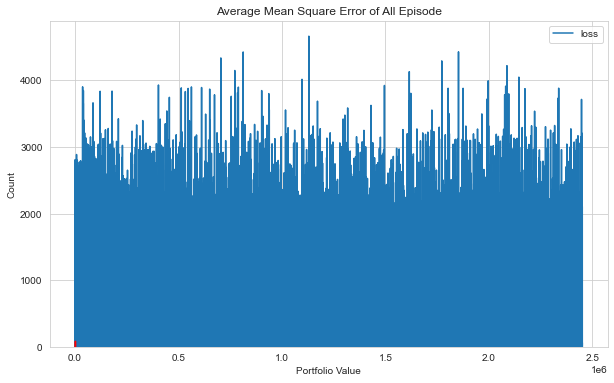

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

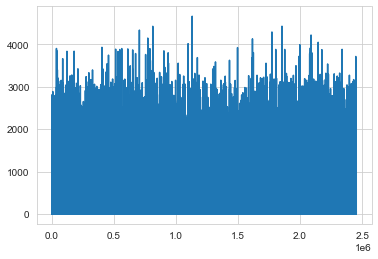

In [5]:
plt.plot(agent.model.losses)

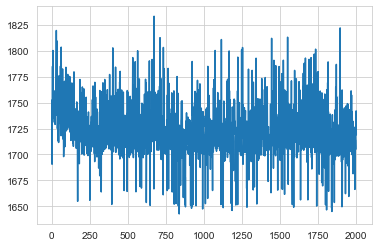

In [6]:
plt.plot(portfolio_value)

episode end value: 1358.68, duration: 0:00:00.175041
Sell: 394 times, Buy: 357 times


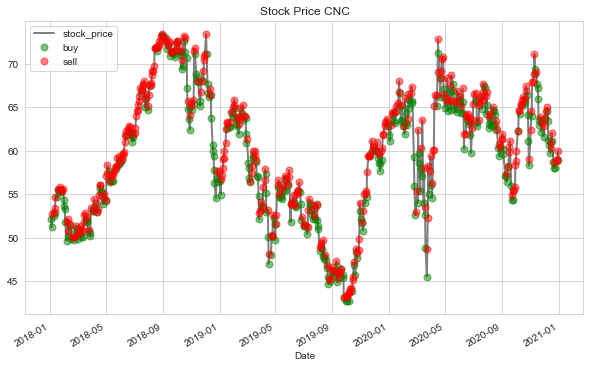

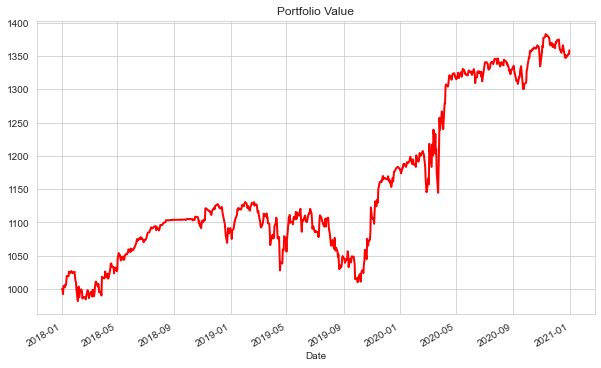

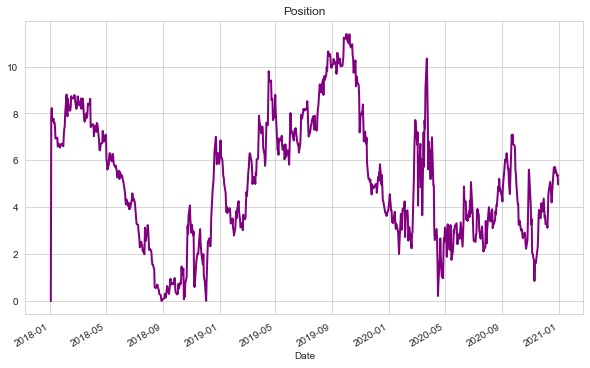

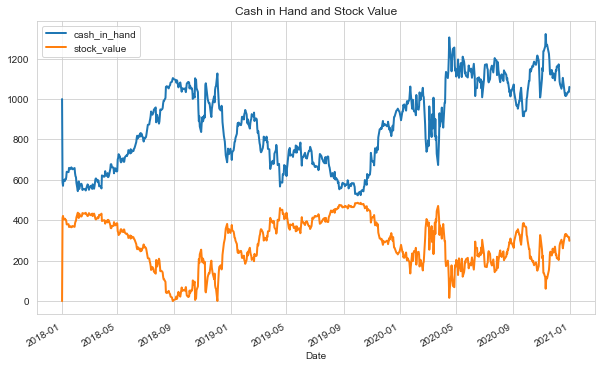

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CNC
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 10.77 %
Volatility: 0.1166
shape ratio: 0.8295
Maximun drawdown: -10.63 %
Calmar ratio: 1.0131
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 5.39 %
Volatility (benchmark): 0.4035
shape ratio: 0.1063
Maximun drawdown: -41.82 %
Calmar ratio (benchmark): 0.1289


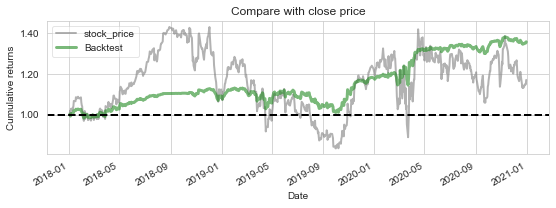

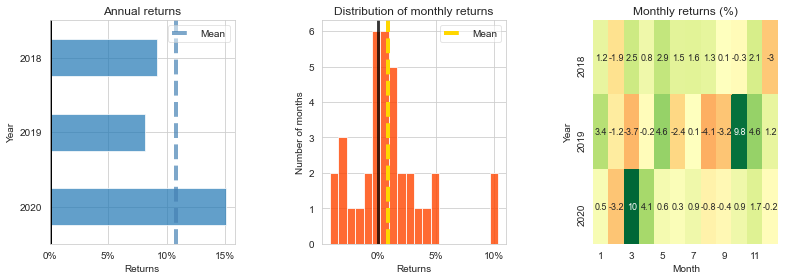

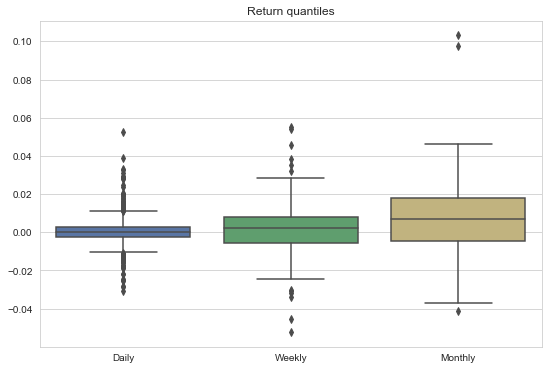

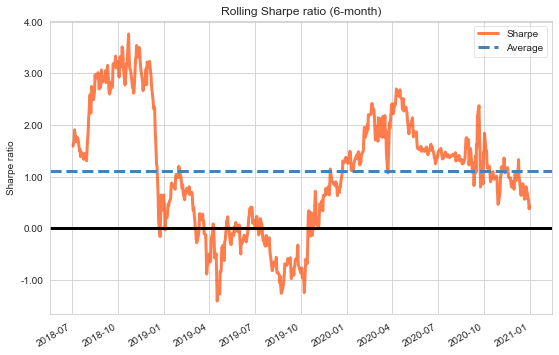

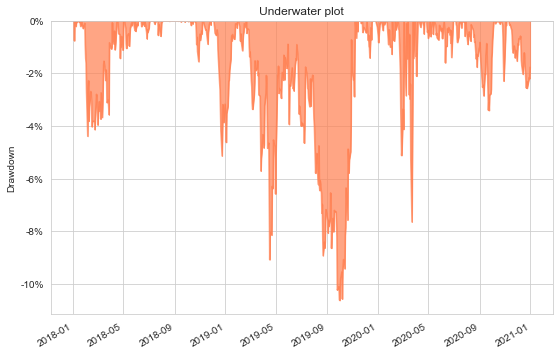

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')